In [1]:
import pandas as pd
import numpy as np
import folium
from sklearn import preprocessing
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.colors as colors

We start with the analysis of the first DataSet which is about the crops. We are taking into account only the years after 2000, for the moment. 

In [2]:
#loading the DataSet
path = 'data/Production_Crops_E_All_Data_NOFLAG.csv'
crops = pd.read_csv(path, encoding = "ISO-8859-1")

In [3]:
crops.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017
0,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,ha,NaN,NaN,NaN,...,12000.0,11029.0,11210.0,13469.0,13490.0,14114.0,13703.0,14676.0,19481.0,19793.0
1,2,Afghanistan,221,"Almonds, with shell",5419,Yield,hg/ha,NaN,NaN,NaN,...,35000.0,39154.0,49955.0,45000.0,45960.0,29910.0,19996.0,16521.0,16859.0,13788.0
2,2,Afghanistan,221,"Almonds, with shell",5510,Production,tonnes,NaN,NaN,NaN,...,42000.0,43183.0,56000.0,60611.0,62000.0,42215.0,27400.0,24246.0,32843.0,27291.0
3,2,Afghanistan,711,"Anise, badian, fennel, coriander",5312,Area harvested,ha,NaN,NaN,NaN,...,15000.0,17748.0,17000.0,19500.0,18500.0,18500.0,30000.0,25000.0,26019.0,28873.0
4,2,Afghanistan,711,"Anise, badian, fennel, coriander",5419,Yield,hg/ha,NaN,NaN,NaN,...,6000.0,6203.0,6000.0,6414.0,6757.0,6757.0,7167.0,7200.0,6923.0,6830.0


As we can see for the DS for each item, for each country there are three options fro the unit parameter. 
<br>
Production Quantity and Seed: tonnes
<br>
Area harvested: hectares
<br>
Yield: tonnes per hectare.

We decided to keep only Production, this beacuse this feature is the more significant for the purpose of the project in general. **we are probably going to consider the *Area harvest* when we will talk about the energy source consuption**

In [4]:
crops_production = crops[crops['Element']=='Production']
crops_yield = crops[crops['Element']=='Yield']

In [5]:
#years we need to drop
years = ['Y'+str(1900+x) for x in range(61,100)]
crops_production = crops_production.drop(years, axis=1)

In [6]:
crops_production.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2000,Y2001,Y2002,...,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017
2,2,Afghanistan,221,"Almonds, with shell",5510,Production,tonnes,12000.0,15000.0,11774.0,...,42000.0,43183.0,56000.0,60611.0,62000.0,42215.0,27400.0,24246.0,32843.0,27291.0
5,2,Afghanistan,711,"Anise, badian, fennel, coriander",5510,Production,tonnes,2500.0,1000.0,2000.0,...,9000.0,11008.0,10200.0,12508.0,12500.0,12500.0,21500.0,18000.0,18012.0,19719.0
8,2,Afghanistan,515,Apples,5510,Production,tonnes,40540.0,39542.0,35630.0,...,56061.0,72765.0,59850.0,62041.0,70000.0,78597.0,89403.0,89733.0,140903.0,175000.0
11,2,Afghanistan,526,Apricots,5510,Production,tonnes,42840.0,38000.0,45758.0,...,59559.0,60000.0,66560.0,67995.0,83500.0,90000.0,90000.0,87686.0,17894.0,131816.0
14,2,Afghanistan,44,Barley,5510,Production,tonnes,74000.0,87000.0,345000.0,...,333000.0,486000.0,437000.0,305900.0,504000.0,514000.0,521000.0,403000.0,301856.0,94995.0


In [7]:
#crops_production['Area'] = crops_production['Area'].replace('United States of America', 'United States')
changes = {'Area' : { 'Bosnia and Herzegovina' : 'Bosnia and Herz.' ,
                    'Brunei Darussalam' : 'Brunei',
                    "Czechoslovakia" : "Czechia",
                    "Republic of Korea" : 'South Korea',
                    "Democratic People's Republic of Korea" : 'North Korea',
                    "Democratic Republic of the Congo" : 'Dem. Rep. Congo',
                    "Bolivia (Plurinational State of)" : 'Bolivia',
                    "Venezuela (Bolivarian Republic of)" : 'Venezuela',
                    "Republic of Moldova" : 'Moldova',
                     "Dominican Republic" : 'Dominican Rep.',
                     "Equatorial Guinea" : "Eq. Guinea",
                     "Eswatini" : "eSwatini",
                     "Ethiopia PDR" : "Ethiopia",
                     "Iran (Islamic Republic of)":"Iran",
                     "Serbia and Montenegro" : "Serbia",
                     "Sudan (former)" : "Sudan",
                     "South Sudan" : "S. Sudan",
                     "Syrian Arab Republic":"Syria",
                     "The former Yugoslav Republic of Macedonia":"Macedonia",
                     "United Republic of Tanzania":"Tanzania",
                     "Viet Nam": "Vietnam",
                     'Russian Federation':"Russia",
                     'Central African Republic' :'Central African Rep.'
                    }}
crops_production= crops_production.replace(changes)

We are now intereste in what are the possible **Item** producted.

In [8]:
#crops_production['Item'].unique()[:10]

For the moment we decided not to clean the Item column. Indeed we are considering the element producted in term of tonnes.

Now we need to classify the country in terms of production, wed like to remember we are taking into account only the last years.

In [9]:
crops_production = crops_production.groupby('Area').sum()
to_drop = ['Area Code','Item Code','Element Code']
crops_production = crops_production.drop(to_drop, axis=1)

We have to drop the index which are not rapresenting a country, but a region

In [10]:
world_df = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
countries = set(world_df['name'])
to_delete = set(crops_production.index).difference(countries)
crops_production = crops_production.drop(to_delete, axis=0)

In [11]:
def norm(col):
    return col/sum(col)

In [12]:
crops_production['tot'] = crops_production.apply(norm).sum(axis=1)

In [13]:
result = crops_production.sort_values(by=['tot'], ascending=0)
result = result[['tot']]

In [14]:
result['tot'] = result['tot']*100/max(result['tot'])
result.head(10)

,tot
Area,
China,100.000000
United States of America,55.802097
India,47.297434
Brazil,33.641452
Indonesia,14.707285
Russia,12.629400
Nigeria,9.929887
France,9.238524
Argentina,8.561252


In [15]:
def mapp(result,result_name,world_df=world_df):
    merged = world_df.set_index('name').join(result)
    merged = merged.dropna(subset=['tot'])
    vmin, vmax, vcenter = merged.tot.min(), merged.tot.max(), 0.1
    divnorm = colors.DivergingNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
    ax = merged.plot(column='tot', figsize=(15,10),  k=9,norm=divnorm,cmap='OrRd', linewidth=1,edgecolor = "black",
                     legend=True,
                      legend_kwds={'orientation': "horizontal"})
    ax.set_title(result_name)
    ax.figure.savefig(result_name+'.png')
    return

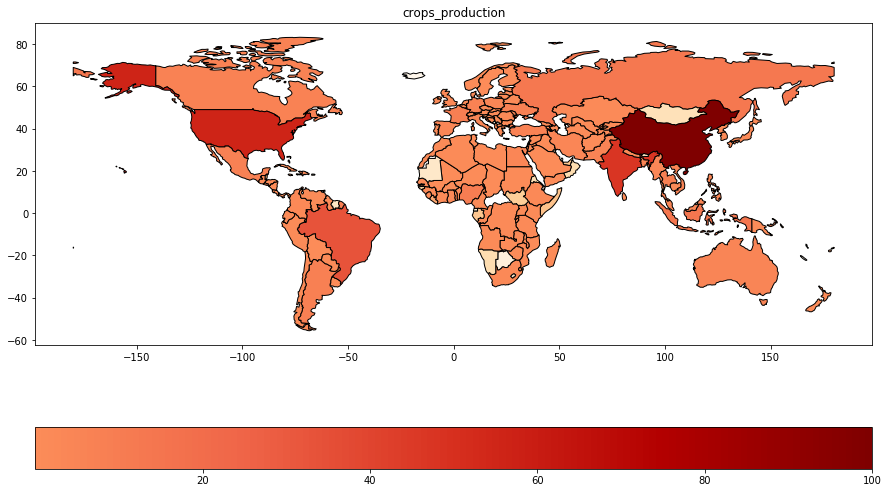

In [16]:
mapp(result,'crops_production')

In [17]:
def clean_df(df,years,to_drop,changes):
    df= df.replace(changes)
    df = df.drop(years, axis=1)
    df = df.groupby('Area').sum()
    df = df.drop(to_drop, axis=1)
    to_delete = set(df.index).difference(countries)
    df = df.drop(to_delete, axis=0)
    df['tot'] = 0
    df['tot'] = df.apply(norm).sum(axis=1)
    df = df.sort_values(by=['tot'], ascending=0)
    df = df[['tot']]
    df['tot'] = df['tot']*100/max(df['tot'])
    return df

In [18]:
path = 'data/Production_CropsProcessed_E_All_Data.csv'
crops_processed = pd.read_csv(path, encoding = "ISO-8859-1")

In [19]:
crops_processed.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2010,Y2010F,Y2011,Y2011F,Y2012,Y2012F,Y2013,Y2013F,Y2014,Y2014F
0,2,Afghanistan,767,Cotton lint,5510,Production,tonnes,17000.0,*,26000.0,...,10890.0,Im,10890.0,Im,11979.0,Im,13917.0,Im,14000.0,F
1,2,Afghanistan,329,Cottonseed,5510,Production,tonnes,34000.0,*,52000.0,...,21450.0,Im,21450.0,Im,23595.0,Im,42173.0,NaN,42829.0,NaN
2,2,Afghanistan,165,Molasses,5510,Production,tonnes,2120.0,Fc,3023.0,...,1210.0,Im,1212.0,Im,1153.0,Im,1188.0,Im,1017.0,Im
3,2,Afghanistan,331,"Oil, cottonseed",5510,Production,tonnes,4997.0,Fc,7716.0,...,3653.0,Im,3653.0,Im,4018.0,Im,4714.0,Im,7489.0,Im
4,2,Afghanistan,334,"Oil, linseed",5510,Production,tonnes,3531.0,Fc,3701.0,...,356.0,Im,784.0,Im,784.0,Im,784.0,Im,790.0,F


In [20]:
years = ['Y'+str(1900+x) for x in range(61,100)] + ['Y'+str(1900+x)+'F' for x in range(61,100)] +['Y'+str(2000+x)+'F' for x in range(0,15)]
to_drop = ['Area Code','Item Code','Element Code']

In [21]:
result = clean_df(crops_processed,years,to_drop,changes)

In [22]:
result.head(10)

,tot
Area,
China,100.000000
Brazil,73.896855
United States of America,69.351729
India,58.484636
Indonesia,31.428371
Malaysia,25.308264
Germany,22.002187
Mexico,18.719345
Russia,18.315239


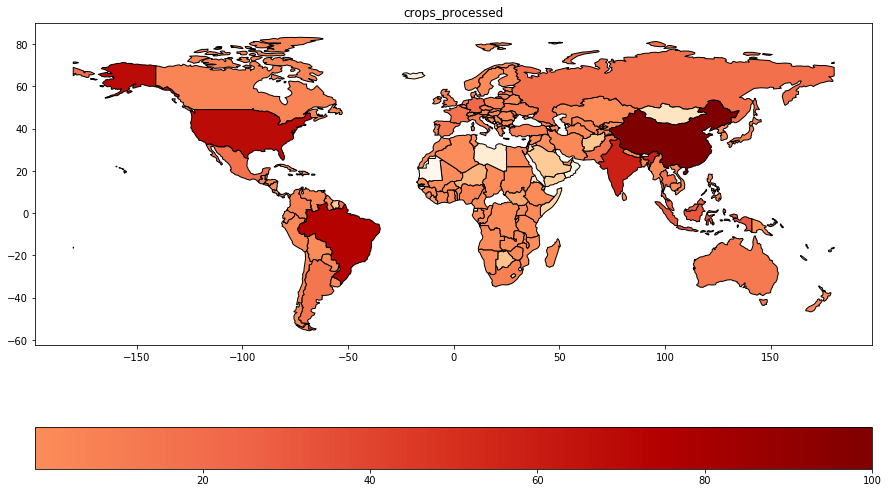

In [23]:
mapp(result,'crops_processed')

In [24]:
path = 'data/Production_LivestockPrimary_E_All_Data_NOFLAG.csv'
live_stock = pd.read_csv(path, encoding = "ISO-8859-1")

In [25]:
live_stock.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017
0,2,Afghanistan,1062,"Eggs, hen, in shell",5313,Laying,1000 Head,4000.0,4400.0,4600.0,...,9100.0,8700.0,8200.0,9600.0,9500.0,9500.0,9500.0,9337.0,9369.0,10688.0
1,2,Afghanistan,1062,"Eggs, hen, in shell",5410,Yield,100mg/An,25000.0,25000.0,25000.0,...,18349.0,19285.0,19932.0,17927.0,18947.0,18947.0,19474.0,21253.0,21263.0,18713.0
2,2,Afghanistan,1062,"Eggs, hen, in shell",5510,Production,tonnes,10000.0,11000.0,11500.0,...,16698.0,16778.0,16344.0,17210.0,18000.0,18000.0,18500.0,19844.0,19921.0,20000.0
3,2,Afghanistan,1067,"Eggs, hen, in shell (number)",5513,Production,1000 No,200000.0,220000.0,230000.0,...,333960.0,335560.0,326880.0,344200.0,360000.0,360000.0,370000.0,396880.0,398420.0,400000.0
4,2,Afghanistan,919,"Hides, cattle, fresh",5320,Producing Animals/Slaughtered,Head,360000.0,384000.0,396000.0,...,739000.0,750000.0,727800.0,766700.0,772000.0,744500.0,NaN,NaN,NaN,NaN


In [26]:
live_stock_production = live_stock[live_stock['Element']=='Production']

In [27]:
years = ['Y'+str(1900+x) for x in range(61,100)] #+ ['Y'+str(1900+x)+'F' for x in range(61,100)] +['Y'+str(2000+x)+'F' for x in range(0,15)]
to_drop = ['Area Code','Item Code','Element Code']

In [28]:
result = clean_df(live_stock_production,years,to_drop,changes)
result.head(10)

,tot
Area,
China,100.000000
United States of America,36.565817
India,26.462497
Brazil,17.189304
Russia,10.727873
Germany,8.956010
France,7.768258
Pakistan,7.738419
Mexico,7.730874


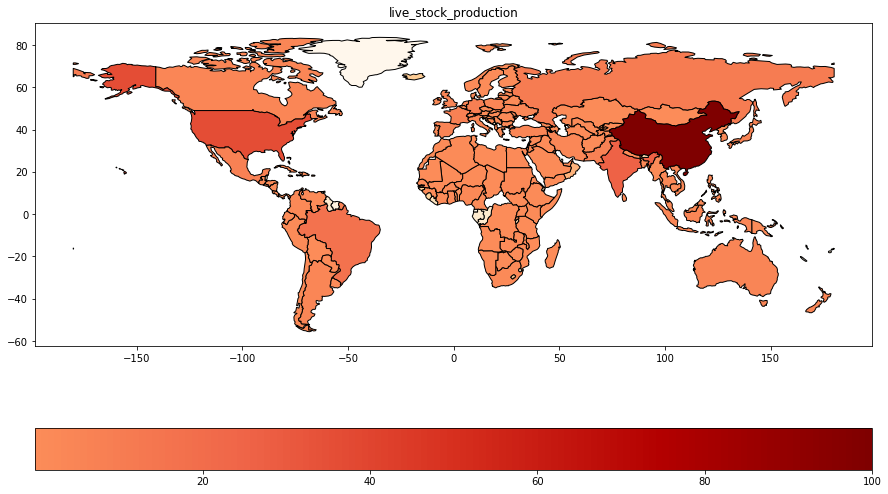

In [29]:
mapp(result,'live_stock_production')

In [30]:
path = 'data/Value_of_Production_E_All_Data_NOFLAG.csv'
Value_of_production = pd.read_csv(path, encoding = "ISO-8859-1")

In [31]:
Value_of_production.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016
0,2,Afghanistan,221,"Almonds, with shell",152,Gross Production Value (constant 2004-2006 100...,1000 Int. $,NaN,NaN,NaN,...,92899.455089,123940.698000,127431.694327,165254.264000,178861.182059,182960.078000,124575.156335,80856.550600,71549.194374,96918.674867
1,2,Afghanistan,221,"Almonds, with shell",154,Net Production Value (constant 2004-2006 1000 I$),1000 Int. $,NaN,NaN,NaN,...,92899.455089,123940.698000,127431.694327,165254.264000,178861.182059,182960.078000,124575.156335,80856.550600,71549.194374,96918.674867
2,2,Afghanistan,221,"Almonds, with shell",56,Gross Production Value (current million SLC),SLC,NaN,NaN,NaN,...,5433.830473,8980.020000,8032.038000,12079.200000,13995.079900,14911.000000,9230.459191,5563.109132,4824.773367,6050.024466
3,2,Afghanistan,221,"Almonds, with shell",55,Gross Production Value (constant 2004-2006 mil...,SLC,NaN,NaN,NaN,...,3280.355179,4376.446667,4499.716581,5835.262222,6315.733546,6460.468889,4398.849906,2855.110444,2526.460140,3422.277092
4,2,Afghanistan,711,"Anise, badian, fennel, coriander",152,Gross Production Value (constant 2004-2006 100...,1000 Int. $,NaN,NaN,NaN,...,93962.672000,49744.944000,57275.009778,56377.603200,64207.463034,69090.200000,69090.200000,73114.852434,79457.968291,77478.699955


In [32]:
Value_of_production_NET = Value_of_production[Value_of_production['Element']==
                                              'Net Production Value (constant 2004-2006 1000 I$)']

In [33]:
years = ['Y'+str(1900+x) for x in range(61,100)] #+ ['Y'+str(1900+x)+'F' for x in range(61,100)] +['Y'+str(2000+x)+'F' for x in range(0,15)]
to_drop = ['Area Code','Item Code','Element Code']

In [34]:
result = clean_df(Value_of_production_NET,years,to_drop,changes)
result.head(10)

,tot
Area,
China,100.000000
United States of America,45.308604
India,43.642346
Brazil,25.479670
Indonesia,11.208533
Russia,8.812355
France,8.583617
Argentina,7.873950
Pakistan,7.261402


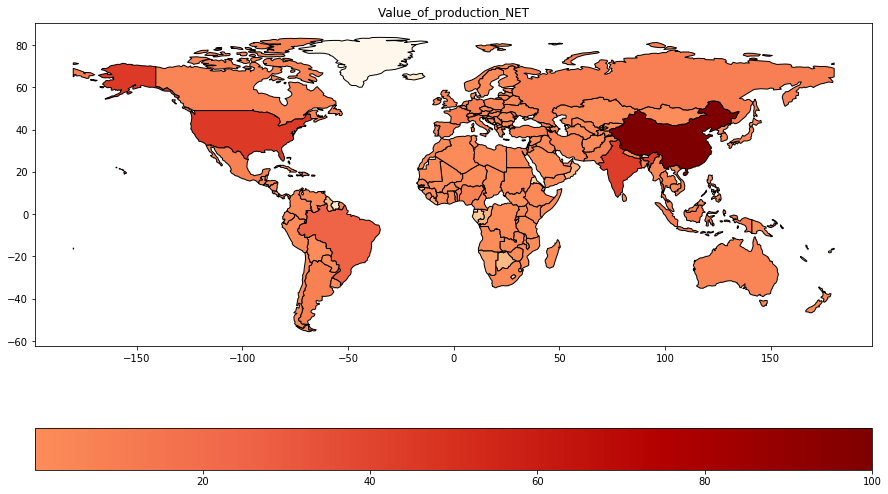

In [35]:
mapp(result,'Value_of_production_NET')

## Interactive map

In [47]:
crops_production = crops[crops['Element']=='Production']
crops_production.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1962,Y1963,...,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017
2,2,Afghanistan,221,"Almonds, with shell",5510,Production,tonnes,NaN,NaN,NaN,...,42000.0,43183.0,56000.0,60611.0,62000.0,42215.0,27400.0,24246.0,32843.0,27291.0
5,2,Afghanistan,711,"Anise, badian, fennel, coriander",5510,Production,tonnes,NaN,NaN,NaN,...,9000.0,11008.0,10200.0,12508.0,12500.0,12500.0,21500.0,18000.0,18012.0,19719.0
8,2,Afghanistan,515,Apples,5510,Production,tonnes,15100.0,15100.0,15100.0,...,56061.0,72765.0,59850.0,62041.0,70000.0,78597.0,89403.0,89733.0,140903.0,175000.0
11,2,Afghanistan,526,Apricots,5510,Production,tonnes,32000.0,32000.0,32000.0,...,59559.0,60000.0,66560.0,67995.0,83500.0,90000.0,90000.0,87686.0,17894.0,131816.0
14,2,Afghanistan,44,Barley,5510,Production,tonnes,378000.0,378000.0,378000.0,...,333000.0,486000.0,437000.0,305900.0,504000.0,514000.0,521000.0,403000.0,301856.0,94995.0


In [37]:
def interactive_df(df, changes =changes, to_drop=to_drop):
    df= df.replace(changes)
    df = df.drop(to_drop, axis=1)
    df = df.groupby('Area').sum()
    to_delete = set(df.index).difference(countries)
    df = df.drop(to_delete, axis=0)
    df = df.apply(norm)*100
    df.columns = df.columns.str.replace('Y', '')
    df = df.stack()
    df = df.reset_index()
    df = df.rename(columns={'level_1': 'YEAR', 0: 'tot'})
    df['YEAR'] = df['YEAR'].astype(int)
    return df

In [38]:
interactive_crops = interactive_df(crops_production)
#interactive_crops_proc = interactive_df(crops_processed)

In [39]:
def mapp_interactive(result, world_df=world_df):
    merged = world_df.set_index('name').join(result)
    merged = merged.dropna(subset=['tot'])
    vmin, vmax, vcenter = merged.tot.min(), merged.tot.max(), 0.1
    divnorm = colors.DivergingNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
    ax = merged.plot(column='tot', figsize=(15,10),  k=9,norm=divnorm,cmap='Greens', linewidth=1,edgecolor = "black",
                     legend=True,
                      legend_kwds={'orientation': "horizontal"})
    return

In [40]:
df = interactive_crops
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
range_year = (min(df['YEAR']),max(df['YEAR']))
def plot_func(year):
    result = df
    result = result.set_index('Area')
    result = result[result['YEAR']==year]
    result = result.drop('YEAR', axis=1)
    mapp_interactive(result)

interact(plot_func,year = range_year)

interactive(children=(IntSlider(value=1989, description='year', max=2017, min=1961), Output()), _dom_classes=(…

<function __main__.plot_func(year)>

In [41]:
interactive_crops_proc = interactive_df(crops_processed)

In [42]:
df = interactive_crops_proc
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
range_year = (min(df['YEAR']),max(df['YEAR']))
def plot_func(year):
    result = df
    result = result.set_index('Area')
    result = result[result['YEAR']==year]
    result = result.drop('YEAR', axis=1)
    mapp_interactive(result)

interact(plot_func,year = range_year)

interactive(children=(IntSlider(value=1987, description='year', max=2014, min=1961), Output()), _dom_classes=(…

<function __main__.plot_func(year)>

In [43]:
interactive_live_stock = interactive_df(live_stock_production)

In [44]:
df = interactive_live_stock
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
range_year = (min(df['YEAR']),max(df['YEAR']))
def plot_func(year):
    result = df
    result = result.set_index('Area')
    result = result[result['YEAR']==year]
    result = result.drop('YEAR', axis=1)
    mapp_interactive(result)

interact(plot_func,year = range_year)

interactive(children=(IntSlider(value=1989, description='year', max=2017, min=1961), Output()), _dom_classes=(…

<function __main__.plot_func(year)>

In [45]:
interactiove_values = interactive_df(Value_of_production_NET)

In [46]:
df = interactiove_values
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
range_year = (min(df['YEAR']),max(df['YEAR']))
def plot_func(year):
    result = df
    result = result.set_index('Area')
    result = result[result['YEAR']==year]
    result = result.drop('YEAR', axis=1)
    mapp_interactive(result)

interact(plot_func,year = range_year)

interactive(children=(IntSlider(value=1988, description='year', max=2016, min=1961), Output()), _dom_classes=(…

<function __main__.plot_func(year)>